# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


# Importing Different different classes in keras for building CNN

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### Importing matplotlib and plotting a sample image from train dataset

(60000, 28, 28)


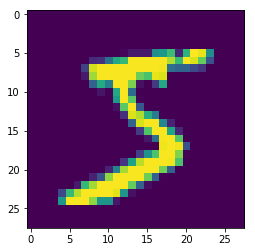

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

### Changing shape of the image to keep in a format of gray scale image

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

### Convert the data to float data type

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### One hot encoding

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Buliding model

This code chunk creates sequential model by stacking convolutions to build CNN.

Following is the shape of the channels layer-wise :

28x28x1 | 3x3x1x10 -> 26x26x10

26x26x10 | 3x3x10x16 -> 24x24x16

24x24x16 | 3x3x16x24 -> 22x22x24

22x22x24 ---- Max Pooling ----> 11x11x24

11x11x24 | 3x3x24x16 -> 9x9x16

9x9x16 | 3x3x16x24 -> 7x7x24

7x7x24 | 3x3x24x24 -> 5x5x24

5x5x24 | 1x1x24x10 -> 5x5x10

5x5x10 | 5x5x10x10 -> 1x1x10

- Here we first reached a network where we have desired number of parameters and accuracy was near 99%, then we played with the number of kernels. 

- we found that 16 and 24 were enough number of kernels for this dataset, so we started with the minimum number of kernels required and then went ahead to increase it till 24

**NOTE** :

We haven't used 1x1 kernel or BN or DropOuts here.

Without them we are able to reach the accuracy of 99.27% with around 19k params

In [134]:
from keras.layers import Activation, MaxPooling2D

model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(24, 3, 3, activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(16, 3, 3, activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(24, 3, 3, activation='relu'))
model.add(Convolution2D(24, 3, 3, activation='relu'))
#model.add(Convolution2D(32, 3, 3, activation='relu'))
#model.add(Convolution2D(16, 3, 3, activation='relu'))
#model.add(Convolution2D(16, 3, 3, activation='relu'))

model.add(Convolution2D(10,1, activation='relu'))
model.add(Convolution2D(10, 5))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Ke

In [135]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_307 (Conv2D)          (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_308 (Conv2D)          (None, 24, 24, 16)        1456      
_________________________________________________________________
conv2d_309 (Conv2D)          (None, 22, 22, 24)        3480      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 11, 11, 24)        0         
_________________________________________________________________
conv2d_310 (Conv2D)          (None, 9, 9, 16)          3472      
_________________________________________________________________
conv2d_311 (Conv2D)          (None, 7, 7, 24)          3480      
_________________________________________________________________
conv2d_312 (Conv2D)          (None, 5, 5, 24)          5208      
__________

## Compile the model

- loss function : categorical_crossentropy

- optimiser : Adam

- metric type : Accuracy (here)

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## model.fit()

- trains the model for a given number of epocs (to iterate entire dataset)

- batch size refers to number of images to consider while each traversal through image

In [137]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=15, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/15
60000/60000 [==============================] - 17s 278us/step - loss: 0.2347 - acc: 0.9253
Epoch 2/15
60000/60000 [==============================] - 13s 217us/step - loss: 0.0735 - acc: 0.9776
Epoch 3/15
60000/60000 [==============================] - 13s 222us/step - loss: 0.0534 - acc: 0.9833
Epoch 4/15
60000/60000 [==============================] - 13s 221us/step - loss: 0.0441 - acc: 0.9863
Epoch 5/15
60000/60000 [==============================] - 13s 223us/step - loss: 0.0372 - acc: 0.9888
Epoch 6/15
60000/60000 [==============================] - 13s 214us/step - loss: 0.0331 - acc: 0.9897
Epoch 7/15
60000/60000 [==============================] - 13s 221us/step - loss: 0.0280 - acc: 0.9910
Epoch 8/15
60000/60000 [==============================] - 14s 237us/step - loss: 0.0259 - acc: 0.9915
Epoch 9/15
60000/60000 [==============================] - 15s 247us/step - loss: 0.0210 - acc: 0.9929
Epoch 10/15
60000/60000 [==============================] - 14s 240us/step - loss: 

## Evaluating the model

- returns loss value and metrics of test data

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [139]:
print(score)

[0.028581020020806865, 0.9927]


In [0]:
y_pred = model.predict(X_test)

In [141]:
print(y_pred[:9])
print(y_test[:9])

[[6.61382309e-18 8.63243158e-12 5.05267906e-07 6.99316383e-10
  5.53528023e-09 5.90691450e-13 7.64915531e-22 9.99999523e-01
  4.47513120e-13 7.02858660e-10]
 [8.03120948e-09 3.23897957e-08 1.00000000e+00 1.60219732e-12
  1.32666500e-09 1.87441986e-16 6.25115781e-09 3.26181248e-12
  5.28972283e-11 1.30241192e-14]
 [1.63648062e-16 9.99998569e-01 3.37986594e-09 7.10371920e-13
  2.57482313e-10 4.93224295e-10 8.99650487e-09 1.46660489e-06
  4.68569794e-10 1.71588004e-13]
 [9.99898911e-01 1.29752123e-12 4.33322498e-08 6.80865364e-10
  4.08198364e-09 2.34200446e-08 4.12102854e-05 5.39257215e-11
  5.96534082e-05 2.27515997e-07]
 [2.07382667e-10 1.09492558e-12 2.73100813e-08 4.56928449e-17
  9.99998093e-01 3.37985911e-12 3.66744341e-13 4.84799917e-14
  1.32334397e-13 1.90998526e-06]
 [6.44383576e-15 9.99999166e-01 3.87100627e-08 3.73179569e-12
  4.22386209e-10 1.51196472e-10 9.48998213e-09 8.44938484e-07
  5.00023090e-09 2.82683751e-12]
 [8.61717719e-17 7.82736890e-07 2.35530024e-07 1.74939763e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

## Visualization of the outputs of the kernels just before the last layer

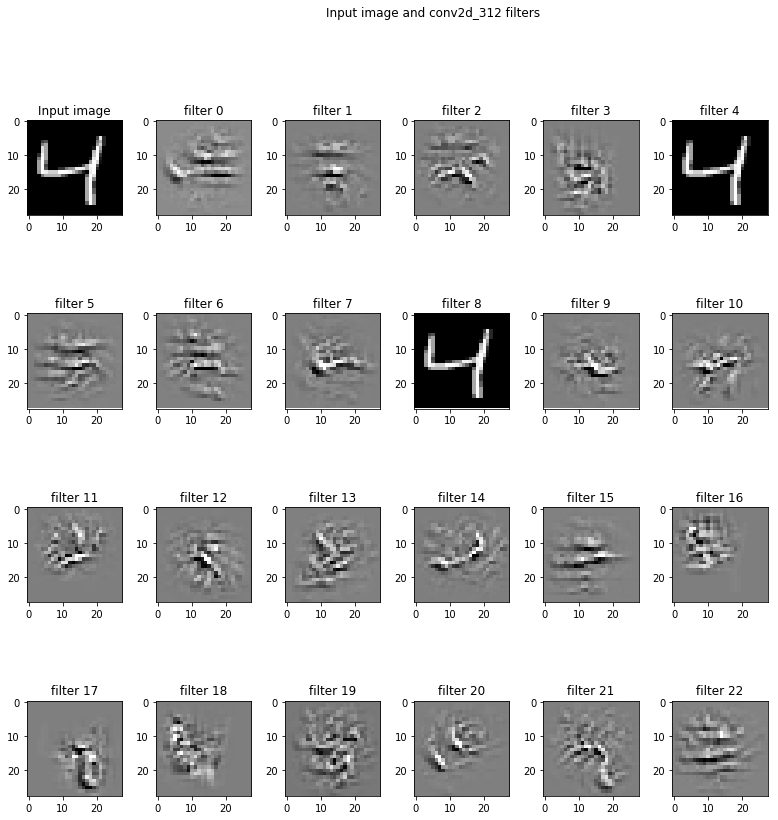

In [144]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_312'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()